In [7]:
#! pip install multiprocess --user

In [8]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.decomposition import PCA

import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import figure
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
matplotlib.rcParams.update({'font.size': 22})
import seaborn as sns

print(__doc__)

from time import time

from multiprocess import Pool
import pdb

Automatically created module for IPython interactive environment


## Read in data as csv 

In [9]:
data=pd.read_table('/Users/gracer/Google Drive/ABCD/important_txt/4Kmeans.csv', sep=',')

## Seperate by sex

In [10]:
dudes = data[data['sex'] == 0]
lady_dudes = data[data['sex'] == 1]

## Get a List of variable names

In [11]:
var_names=list(lady_dudes.columns.values)
cols = lady_dudes.columns
lady_dudes.columns = ['sub','pds_ht2_y',  'pds_skin2_y',  'pds_bdyhair_y','labels_true',
            'pds_f4_2_y',  'pds_f5_y',  'pds_m4_y', 'pds_m5_y', 'interview_age', 'gender',
             'anthroheightcalc',  'anthroweightcalc',  'anthro_waist_cm',
             'hormone_scr_dhea_mean',  'hormone_scr_hse_mean',  'hormone_scr_ert_mean',  'sex']
# print(dudes)
# cols[1]

## Combine variables of interest into a single matrix

In [12]:
labels_true=lady_dudes['labels_true'].values
subs=lady_dudes['sub'].values
f2=lady_dudes['pds_ht2_y'].values
f3=lady_dudes['pds_skin2_y'].values
f4=lady_dudes['pds_bdyhair_y'].values
f5=lady_dudes['pds_f4_2_y'].values
f6=lady_dudes['pds_f5_y'].values
f7=lady_dudes['interview_age'].values
f8=lady_dudes['anthroheightcalc'].values 
f9=lady_dudes['anthroweightcalc'].values
f10=lady_dudes['anthro_waist_cm'].values
f11=lady_dudes['hormone_scr_dhea_mean'].values
f12=lady_dudes['hormone_scr_hse_mean'].values
f13=lady_dudes['hormone_scr_ert_mean'].values
X=np.matrix(zip(f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13))

## Create a list of the variable names included in this analyses

In [13]:
names=['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_m4_y',
'pds_m5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean']

## Check the data 

[(1, 610), (2, 271), (3, 20), (4, 2)]

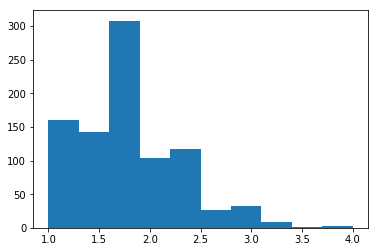

In [14]:
%matplotlib inline
plt.hist(labels_true)
y = np.bincount(labels_true.astype(int))
ii = np.nonzero(y)[0]
zip(ii,y[ii])

An issue is a low number of people in groups 3 and 4

## Possible solution, randomly sample equal numbers
Using the rule of thumb 2^m I need 8 people per cluster 
Possible combinations below

In [15]:
import math
x=math.factorial(70)
y=math.factorial(70-20)
fact=x/y
print(fact)

393849377343759797528386895216640000


## Create target variable (or the one you are comparing)

In [16]:
target_var=pd.DataFrame(lady_dudes['labels_true'].values)
subs_var=pd.DataFrame(subs)
target_var.shape

(903, 1)

## Impute missing values
This will not allow missing data, so have to impute nans

In [17]:
imputer = Imputer()
transformed_values = imputer.fit_transform(X)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum()) 
transformed_values_scale = scale(transformed_values)
transformed_values_scale.shape
#the target variable is the last variable
trans = np.column_stack((transformed_values_scale,subs,target_var.round(decimals=0)))

0


In [18]:
print(trans.shape)
trans[10,:]

(903, 14)


array([1.794456303524673, -0.9160012976566702, -0.8450545827601281,
       0.24962498873615438, -0.19189160229840163, 0.6021071251259197,
       1.9996576547510394, 4.417977219002053, 3.245935807081636,
       -0.8820291919726035, 1.8356440165628365e-15, -9.680805970204422e-15,
       'NDAR_INV0C1ED337', 2.0], dtype=object)

## Function to randomly sample the data and perform the kmeans

In [19]:
def bench_k_means(estimator, name, data):
        t0 = time() #time
        estimator.fit(data) #estimating the fit 
        print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
              % (name, (time() - t0), estimator.inertia_,
                 metrics.homogeneity_score(labels, estimator.labels_),
                 metrics.completeness_score(labels, estimator.labels_),
                 metrics.v_measure_score(labels, estimator.labels_),
                 metrics.adjusted_rand_score(labels, estimator.labels_),
                 metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
                 metrics.silhouette_score(data, estimator.labels_,
                                          metric='euclidean',
                                          sample_size=sample_size)))


In [20]:
def meaner(**kwargs):
    for x in kwargs.items():
        print(x)
#     z=sum(*arg)/len(*arg)
#     return z

In [21]:
def PCA_reducer(DATA):
    n_samples, n_features = DATA.shape
    labels = np.round(targets)
    n_digits = len(np.unique(targets))
    sample_size=n_samples
    
    PCA_results = PCA(n_components=2)
    reduced_data = PCA_results.fit_transform(DATA)
    
    # Dump components relations with features:
    print pd.DataFrame(PCA_results.components_,index = ['PC-1','PC-2'])
    plt.semilogy(PCA_results.explained_variance_ratio_, '--o')
    return (PCA_results.components_, PCA_results.explained_variance_ratio_, 
            PCA_results.explained_variance_, PCA_results.mean_) 
    


In [22]:
def split_list(a_list):
        half = len(a_list)/2
        return a_list[:half], a_list[half:]

In [67]:
def random_selct(DATA):
    dictr = {}
    #defining the levels, based on the final column add the values to the dictionary
    levels = ['lev1','lev2','lev3']
    i=1
    for lev in levels:
        if i < len(levels)+1:
            dictr[lev] = DATA[np.where(DATA[:,-1] == i)]
            i=i+1
    '''
    make dictionaries to populate each run per parallel run
    '''
    rand_dict={}
    target_dict={}
    ind_dict={}
    sub_dict = {}
    '''
    subsetting the data and putting it into a dictionary
    '''
    for key, value in dictr.iteritems():
        #shuffle the data's index
        ind = np.random.permutation(value.shape[0])#random index
        #get the first 20 subjects indexes
        training_idx = ind[:50]#get 20 subjects indexes
        #get the first 20 subjects
        '''
        this needs to be the number of variables/factors you are expecting
        for females this is 12!!!!
        '''
        value_data = value[:,0:12]
#         print(value_data.shape)
        '''
        for females this is 13!!!!
        '''
        sub_data = value[:,12]
#         print(sub_data)
        label_data = value[:,-1]
        training = value_data[training_idx,:]#select 20 subjects from the value in the dictionary
        subs = sub_data[training_idx]
        labels_true = label_data[training_idx]
        #saving the true labels
        target_dict[key] = labels_true #add targets to dictionary
        rand_dict[key] = training #match the randomized data to the ind_dict by key 
        ind_dict[key] = training_idx #add the indexes to the dictionary
        sub_dict[key] = subs
    '''
    combine all the dictionaries we have created thus far. 
    data, index, and targets
    '''    
    list_dicts = [rand_dict, target_dict, ind_dict, sub_dict]
    list_names  = ['rand_dict', 'target_dict', 'ind_dict', 'sub_dict']
    all_dicts = {}
    i = 0
    for d in list_dicts:
        all_dicts[list_names[i]] = list_dicts[i]
        i = i +1
#         print(all_dicts['rand_dict'])
   
    '''
    combine the randomized data by the actual level
    '''
    data=np.vstack((rand_dict['lev1'],rand_dict['lev2'],rand_dict['lev3']))
    print(data.shape)
    '''
    defining the parameters for the k means and the PCA
    '''
    targets=np.hstack((target_dict['lev1'],target_dict['lev2'],target_dict['lev3']))
    targets = targets.astype('int')
    n_samples, n_features = data.shape
    n_digits = len(np.unique(targets))
    sample_size=n_samples
    '''
    defining the parameters for the k means
    '''    
    kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=300)
    ks=kmeans.fit_predict(data)
    indexes=np.hstack((ind_dict['lev1'],ind_dict['lev2'],ind_dict['lev3']))
    subses=np.hstack((sub_dict['lev1'],sub_dict['lev2'],sub_dict['lev3']))
    list_together = [indexes, subses, ks, targets,data]
    '''
    IMPORTANT ALL THE DATA INDEXED WITH SUBJECTS
    '''
    all_together = np.column_stack(list_together)
#     print(all_together.shape)
    ###################################################
    
    
    ###########################################
    #            rebuild to combine data      #
    ###########################################
    comb_data = np.column_stack((data, kmeans.fit_predict(data)))
#     print(comb_data.shape)
    comb_dictr = {}
    '''
    seperating the data based on the fit predict value (found right above)
    '''
    i=0
    for lev in levels:
        if i < len(levels)+1:
            comb_dictr[lev] = comb_data[np.where(comb_data[:,-1] == i)]
            i=i+1
    '''
    defining the parameters for the PCA and running the PCA 
    '''
    ###########################################
    #            PCA                          #
    ###########################################
    PCA_dict={}
    PCA_data={}
    PCA_final = {}

    for key, value in comb_dictr.iteritems():
        PCA_dict[key] = PCA(n_components=2)
        #make sure the last column which is the predicted label isn't included
        PCA_data[key] = PCA_dict[key].fit_transform(value[:,0:12])
        #make sure the last column which is the predicted label isn't included
        ID = np.identity(value[:,0:12].shape[1])  # identity matrix
        coef = PCA_dict[key].transform(ID)
        PCA_final[key] = coef
        
        
        plt.semilogy(PCA_dict[key].explained_variance_ratio_, '--o', label = '%s'%key)
        plt.legend()
        plt.subplot(1, 2, 2)

    reduced_data = PCA(n_components=2).fit_transform(data)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.subplot(1, 2, 1)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
#     plt.show()
    
    ####THINGS TO SAVE#############################################################################        
    kmeans.fit(data)
    y_kmeans = kmeans.predict(data)
    clusters = kmeans.fit_predict(data)
    cluster_space = kmeans.fit_transform(data)
    
    
    
    centroids = kmeans.cluster_centers_   
    
    Components = np.vstack((PCA_dict['lev1'].components_,
                            PCA_dict['lev2'].components_,PCA_dict['lev3'].components_))
    
    Var_ratio = PCA_final
    
    lev1_VarRatio = np.vstack((PCA_final['lev1']))
    print(lev1_VarRatio.shape)
    lev2_VarRatio = np.vstack((PCA_final['lev2']))
    lev3_VarRatio = np.vstack((PCA_final['lev3']))
    
    ind_dict = np.hstack((ind_dict['lev1'],
                            ind_dict['lev2'],ind_dict['lev3']))
    
    ########################################################################################################
    return (clusters, cluster_space,
            centroids,targets,
            all_together ,Components,
            Var_ratio, comb_data,
            lev1_VarRatio,lev2_VarRatio,lev3_VarRatio,
            kmeans,DATA)

# 0clusters
# 1cluster_space, 
# 2centroids, 
# 3targets, 
# 4all_dict,
# 5Components,
# 6Var_ratio, 
# 7full_data,
# 8lev1_VarRatio,
# 9lev2_VarRatio,
# 10lev3_VarRatio
# 11kmeans
# 12DATA

In [68]:
def main(i):
    names = ['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_f4_2_y',
'pds_f5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean',
'labels_pred',
'labels_true']
    
    Clusters = []
    Cluster_space = []
    Centroids = []
    
    Comp = []
    Var_ratio = []
    
    Targets = []
    all_dicts = []
    
    Comb_data = []
    
    Lev1_VarRatio = []
    Lev2_VarRatio = []
    Lev3_VarRatio = []
    
    kmeans = []
    for x in range(0,i):
        print(x)
        Q = random_selct(trans)
        Clusters.append(Q[0])
        Cluster_space.append(Q[1])
        Centroids.append(Q[2])
        
        Targets.append(Q[3])
        all_dicts.append(Q[4])
        
        Comp.append(Q[5])
        Var_ratio.append(Q[6])
        
        Comb_data.append(Q[7])
        
        Lev1_VarRatio.append(Q[8].transpose())
        Lev2_VarRatio.append(Q[9].transpose())
        Lev3_VarRatio.append(Q[10].transpose())
        
        kmeans.append(Q[11])
        
    All_lev1Ratio = np.vstack(Lev1_VarRatio)
    All_lev2Ratio = np.vstack(Lev2_VarRatio)
    All_lev3Ratio = np.vstack(Lev3_VarRatio)
    
    All_clust = np.hstack(Clusters)
    All_clust_space = np.vstack(Cluster_space)
    
    All_labels = np.hstack(Targets)
    All_dicts = np.vstack(all_dicts)
    All_comp = np.vstack(Comp)
    All_var_ratio = Var_ratio
    All_data = np.vstack(Comb_data)
#     print(All_data)
#     print(All_data.shape)
    All_data=pd.DataFrame(data=All_data[1:,1:],index=All_data[1:,0])
    return (All_clust ,All_clust_space,
            All_labels , All_dicts,
            All_comp, All_var_ratio,
            All_data, names,
            All_lev1Ratio, All_lev2Ratio, All_lev3Ratio,
            kmeans, trans, All_dicts)
i = 2
FINAL = []

if __name__ == "__main__": 
    pool = Pool(processes=2)
    FINAL = pool.map(main, (i,i)) 

0
0
(150, 12)
(150, 12)


/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(12, 2)
1
(150, 12)
(12, 2)
1
(150, 12)
(12, 2)
(12, 2)


In [69]:
(FINAL[0][1])

array([[ 11.06189369,  13.41055321,  11.74775728],
       [  2.22124961,   7.72027976,   5.04293521],
       [  1.860773  ,   7.6389395 ,   4.85787658],
       [  3.22765859,   7.51664614,   5.06014684],
       [  2.63357929,   8.23350245,   5.44189787],
       [  6.32915282,  10.02692021,   7.72323907],
       [  2.86875345,   6.67136346,   3.86655388],
       [  2.15541095,   7.86091759,   5.10769505],
       [  2.61436089,   6.95071327,   4.36580454],
       [  2.24583288,   7.39503006,   4.74127909],
       [  3.07589392,   6.64512507,   4.06098917],
       [  2.20276865,   8.10287181,   5.34968844],
       [  2.05077315,   7.05371298,   4.39265704],
       [  1.8189633 ,   7.21496153,   4.23116899],
       [  2.58909322,   8.45068726,   5.80582143],
       [  2.3607251 ,   7.84153891,   4.91395957],
       [  2.21930443,   8.14518208,   5.48358437],
       [  2.49191403,   7.83836548,   5.27973447],
       [  2.22272598,   7.67883797,   4.72577115],
       [  1.90974329,   6.62064

In [70]:
variables = ['All_clust' ,'All_clust_space',
             'All_labels' , 'All_dat',
             'All_comp', 'All_var_ratio',
             'All_data', 'names',
             'All_lev1Ratio', 'All_lev2Ratio',
             'All_lev3Ratio', 'kmeans', 'DATA','All_dicts']
# a, b in x

dict1 ={}
dict2 ={}
dicts = [dict1, dict2]
print(len(FINAL))
i=0
for item in FINAL:
    dicti = dicts[i]
    i=i+1
    ii= 0
    for value in item:
        dicti[variables[ii]] = value
        ii=ii+1

2


In [71]:
dict2['All_dat']

array([[253, 'NDAR_INVTH1YJVJ1', 1, ..., -0.16789210667909393,
        10.916403731194071, -9.680805970204422e-15],
       [197, 'NDAR_INVLABCHP1W', 1, ..., 0.8109487878320415,
        -0.27415665975684655, -1.1168686907730567],
       [23, 'NDAR_INV26V2CZ6Z', 1, ..., -0.8820291919726035,
        1.8356440165628365e-15, -9.680805970204422e-15],
       ..., 
       [18, 'NDAR_INVA01DRNBZ', 1, ..., 1.7819048880260562,
        -0.14781524642182436, 0.18808012450480371],
       [61, 'NDAR_INVWFN7K4C5', 0, ..., 1.1162029678234313,
        -0.15284733685337573, 1.458647054829235],
       [56, 'NDAR_INVT472A3DT', 1, ..., -0.5159494558205678,
        -0.2062234389309029, 1.5996608696906744]], dtype=object)

In [72]:
ds = [dict1, dict2]
d = {}
for k in dict1.iterkeys():
    d[k] = tuple(d[k] for d in ds)

All_lev1Ratio = np.vstack(d['All_lev1Ratio'])
print(All_lev1Ratio.shape)
All_lev2Ratio = np.vstack(d['All_lev2Ratio'])
All_lev3Ratio = np.vstack(d['All_lev3Ratio'])

All_clust = np.hstack(d['All_clust'])
All_clust_space = np.vstack(d['All_clust_space'])

All_labels = np.hstack(d['All_labels'])
# All_index = np.hstack(d['All_index'])

All_comp = np.vstack(d['All_comp'])
# All_var_ratio = Var_ratio

All_data = dict1['All_data'].reset_index().merge(dict2['All_data'], how="left").set_index('index')

All_DATA = np.vstack(d['DATA'])

All_dat = np.vstack(d['All_dat'])


(8, 12)


In [73]:
names = ['index', 'sub','predicted', 'real','pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_f4_2_y',
'pds_f5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean']
all_dat = pd.DataFrame(All_dat)
all_dat.columns = names
all_dat.set_index('index')

,sub,predicted,real,pds_ht2_y,pds_skin2_y,pds_bdyhair_y,pds_f4_2_y,pds_f5_y,interview_age,anthroheightcalc,anthroweightcalc,anthro_waist_cm,hormone_scr_dhea_mean,hormone_scr_hse_mean,hormone_scr_ert_mean
index,,,,,,,,,,,,,,,
253,NDAR_INVTH1YJVJ1,1,1,-1.63858,0.380471,-0.845055,0.249625,-0.191892,0.879012,-1.44427,-1.15675,-1.37357,-0.167892,10.9164,-9.68081e-15
197,NDAR_INVLABCHP1W,1,1,-0.494236,-0.916001,-0.845055,-1.09062,-0.191892,-1.75158,-0.470986,-0.360362,-0.113707,0.810949,-0.274157,-1.11687
23,NDAR_INV26V2CZ6Z,1,1,-0.494236,-0.916001,-0.845055,-1.09062,-0.191892,-1.47468,-0.74051,-0.672631,-0.638651,-0.882029,1.83564e-15,-9.68081e-15
106,NDAR_INVALEZFEEH,1,1,-0.494236,0.380471,-0.845055,-1.09062,-0.191892,0.879012,-0.0966458,-0.129828,0.306248,1.11057,-0.461243,-2.69824
267,NDAR_INVVF5B2JT1,1,1,-1.63858,0.380471,-0.845055,-1.09062,-0.191892,-0.36706,-1.74374,-1.15675,-1.58355,-0.882029,1.83564e-15,-9.68081e-15
174,NDAR_INVHDX0L5M7,1,1,-1.63858,-0.916001,0.32532,-1.09062,-0.191892,-1.75158,-0.845326,-0.43581,-0.953618,1.64448,5.77091,-9.68081e-15
168,NDAR_INVGU0XFNRV,1,1,-0.494236,-0.916001,0.32532,-1.09062,-0.191892,0.602107,0.0530902,0.980926,0.936181,1.24236,-0.296352,0.446345
80,NDAR_INV7MZN86PD,1,1,-0.494236,-0.916001,-0.845055,-1.09062,-0.191892,-0.36706,-0.920194,-0.716642,-0.74364,1.67602,-0.29114,-0.706851
58,NDAR_INV5AEUN2YL,1,1,-0.494236,0.380471,-0.845055,-1.09062,-0.191892,1.43282,0.0530902,0.134238,0.0962708,-0.328967,-0.328162,-1.70777


## Taking the variance from each K mean cluster and PCA, using PCA to find the most important factors over all

Lev3
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_f4_2_y  pds_f5_y  \
PC-1   0.281625     0.257578       0.302055    0.316161  0.295001   
PC-2  -0.057460     0.172557      -0.195834   -0.024860 -0.033654   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1       0.294833          0.234122          0.199581         0.221818   
PC-2      -0.260464          0.072880         -0.142598        -0.222433   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  hormone_scr_ert_mean  
PC-1               0.352966              0.395304              0.253957  
PC-2              -0.283240              0.824188             -0.156030  




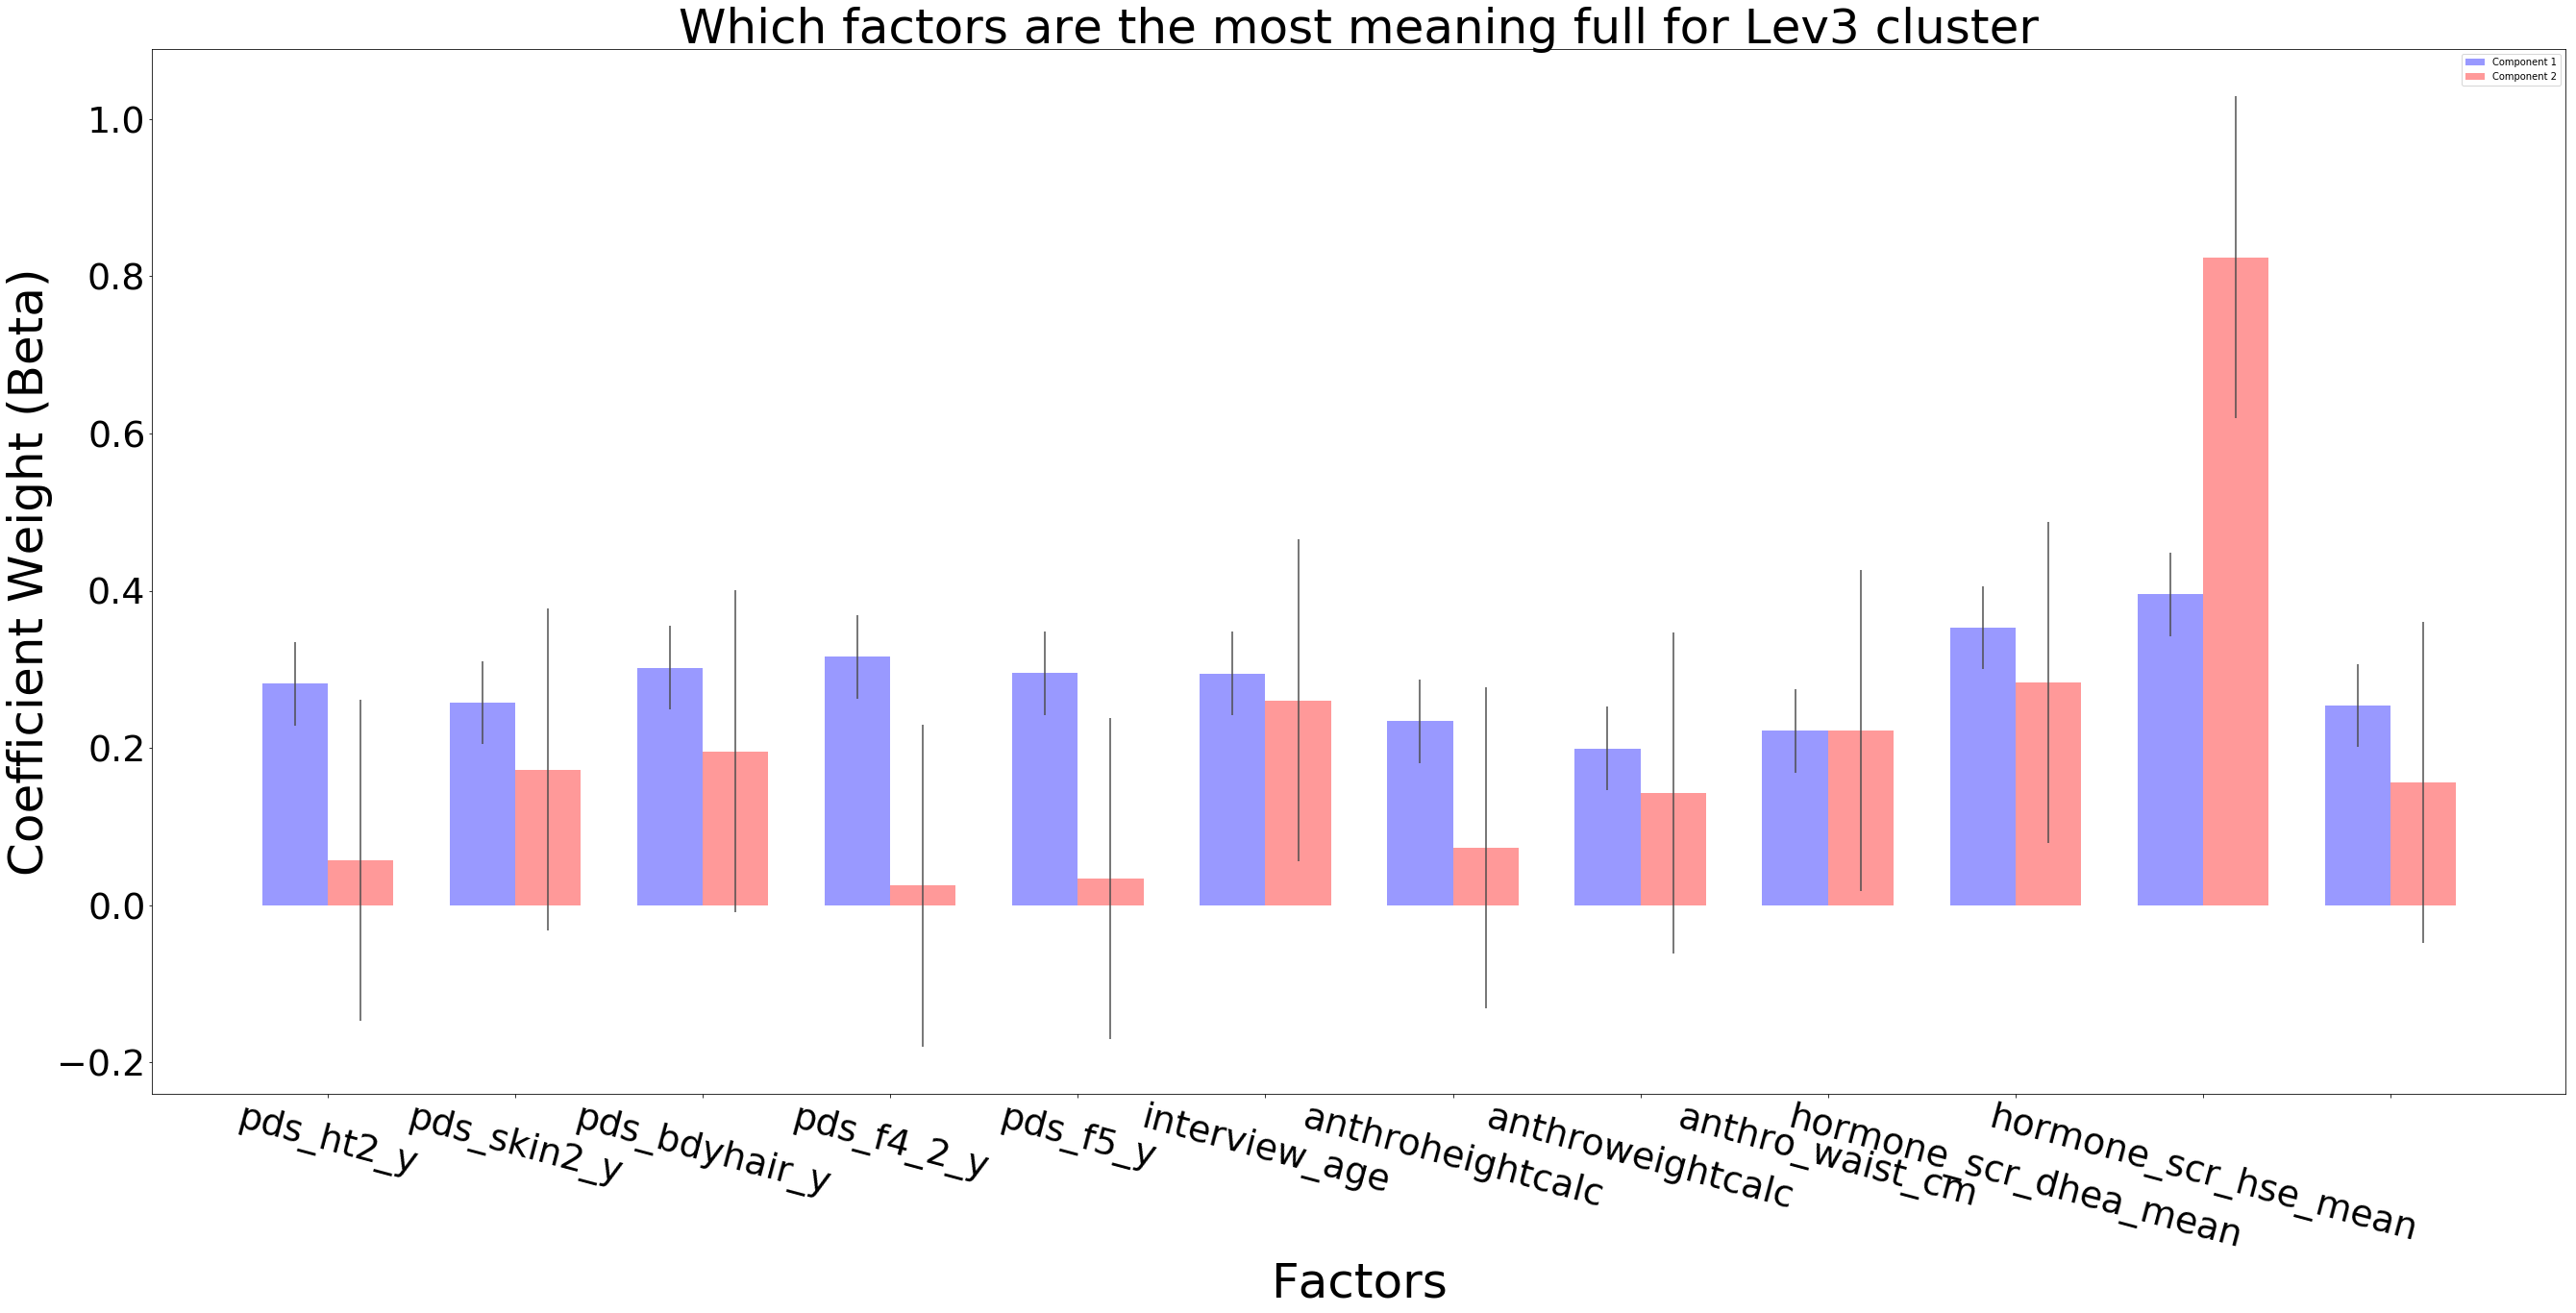

Lev2
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_f4_2_y  pds_f5_y  \
PC-1   0.303092     0.264057       0.293491    0.305164  0.310108   
PC-2   0.032350    -0.058841      -0.236838   -0.394149 -0.027092   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1       0.300483          0.267836          0.220740         0.236817   
PC-2      -0.032235          0.258592         -0.132882        -0.226426   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  hormone_scr_ert_mean  
PC-1               0.329759              0.312740              0.299329  
PC-2               0.032597             -0.073278              0.800027  




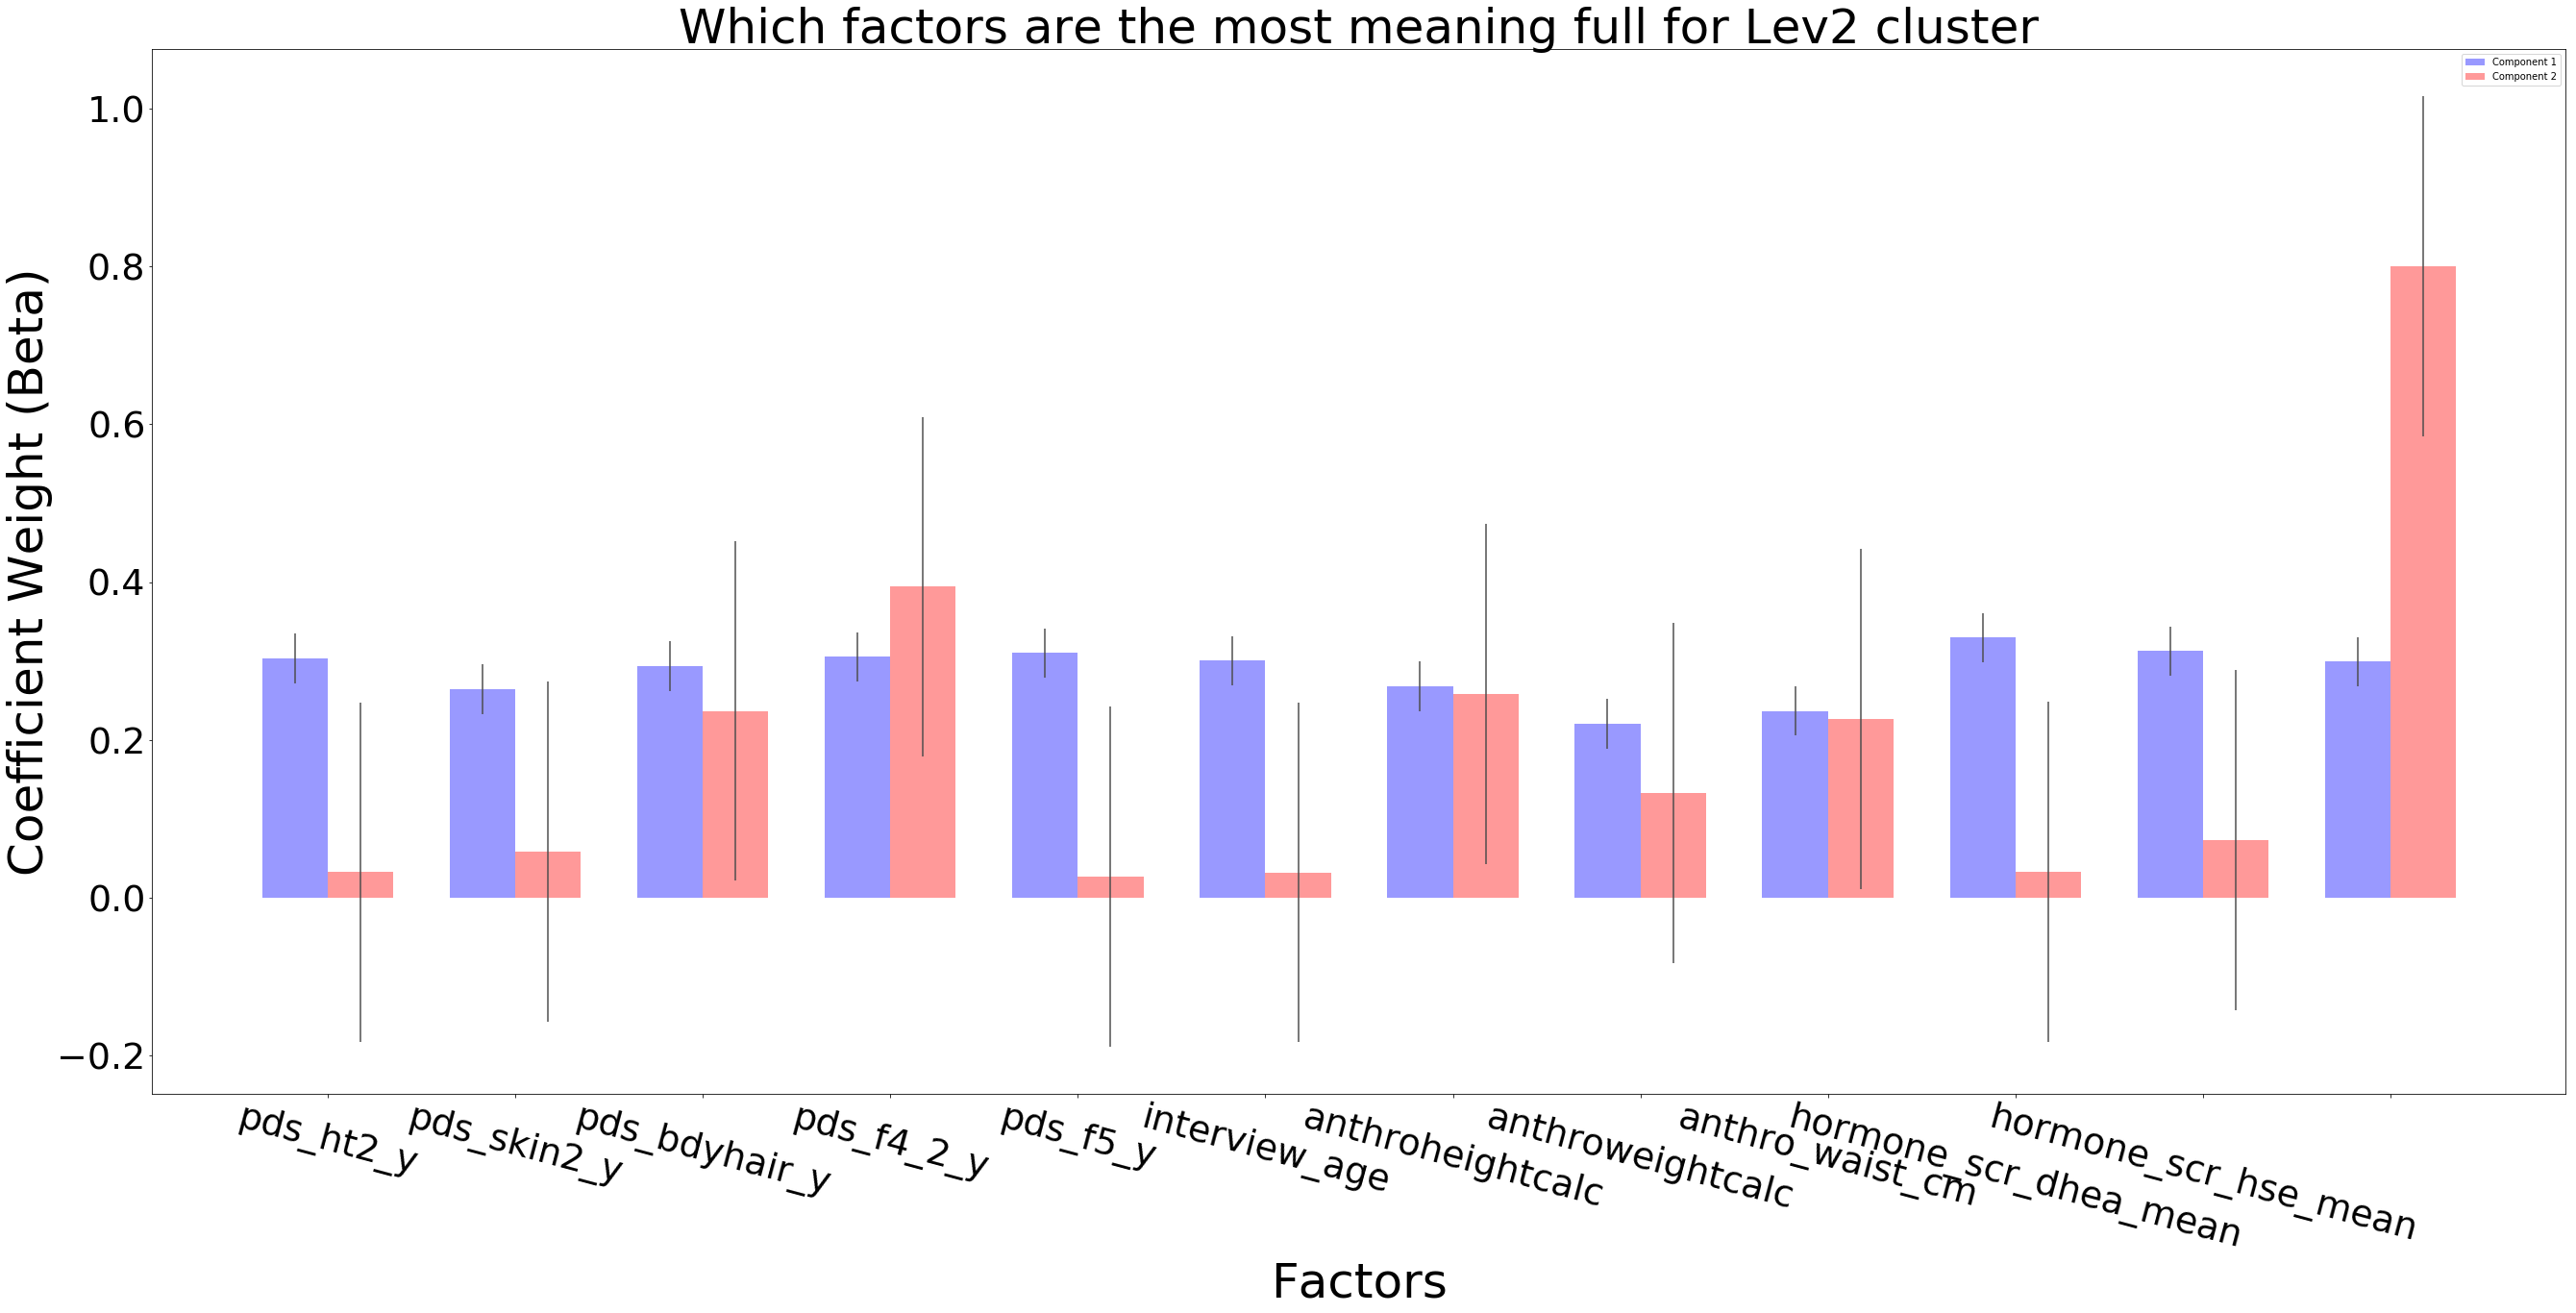

Lev1
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_f4_2_y  pds_f5_y  \
PC-1   0.218638     0.257041       0.198044    0.259877  0.230685   
PC-2   0.154347    -0.073024      -0.117034   -0.090868 -0.054411   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1       0.425018          0.408951          0.306889         0.276289   
PC-2      -0.258612          0.094768         -0.047349        -0.056546   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  hormone_scr_ert_mean  
PC-1               0.251642              0.245229              0.290337  
PC-2              -0.364041              0.849826              0.099496  




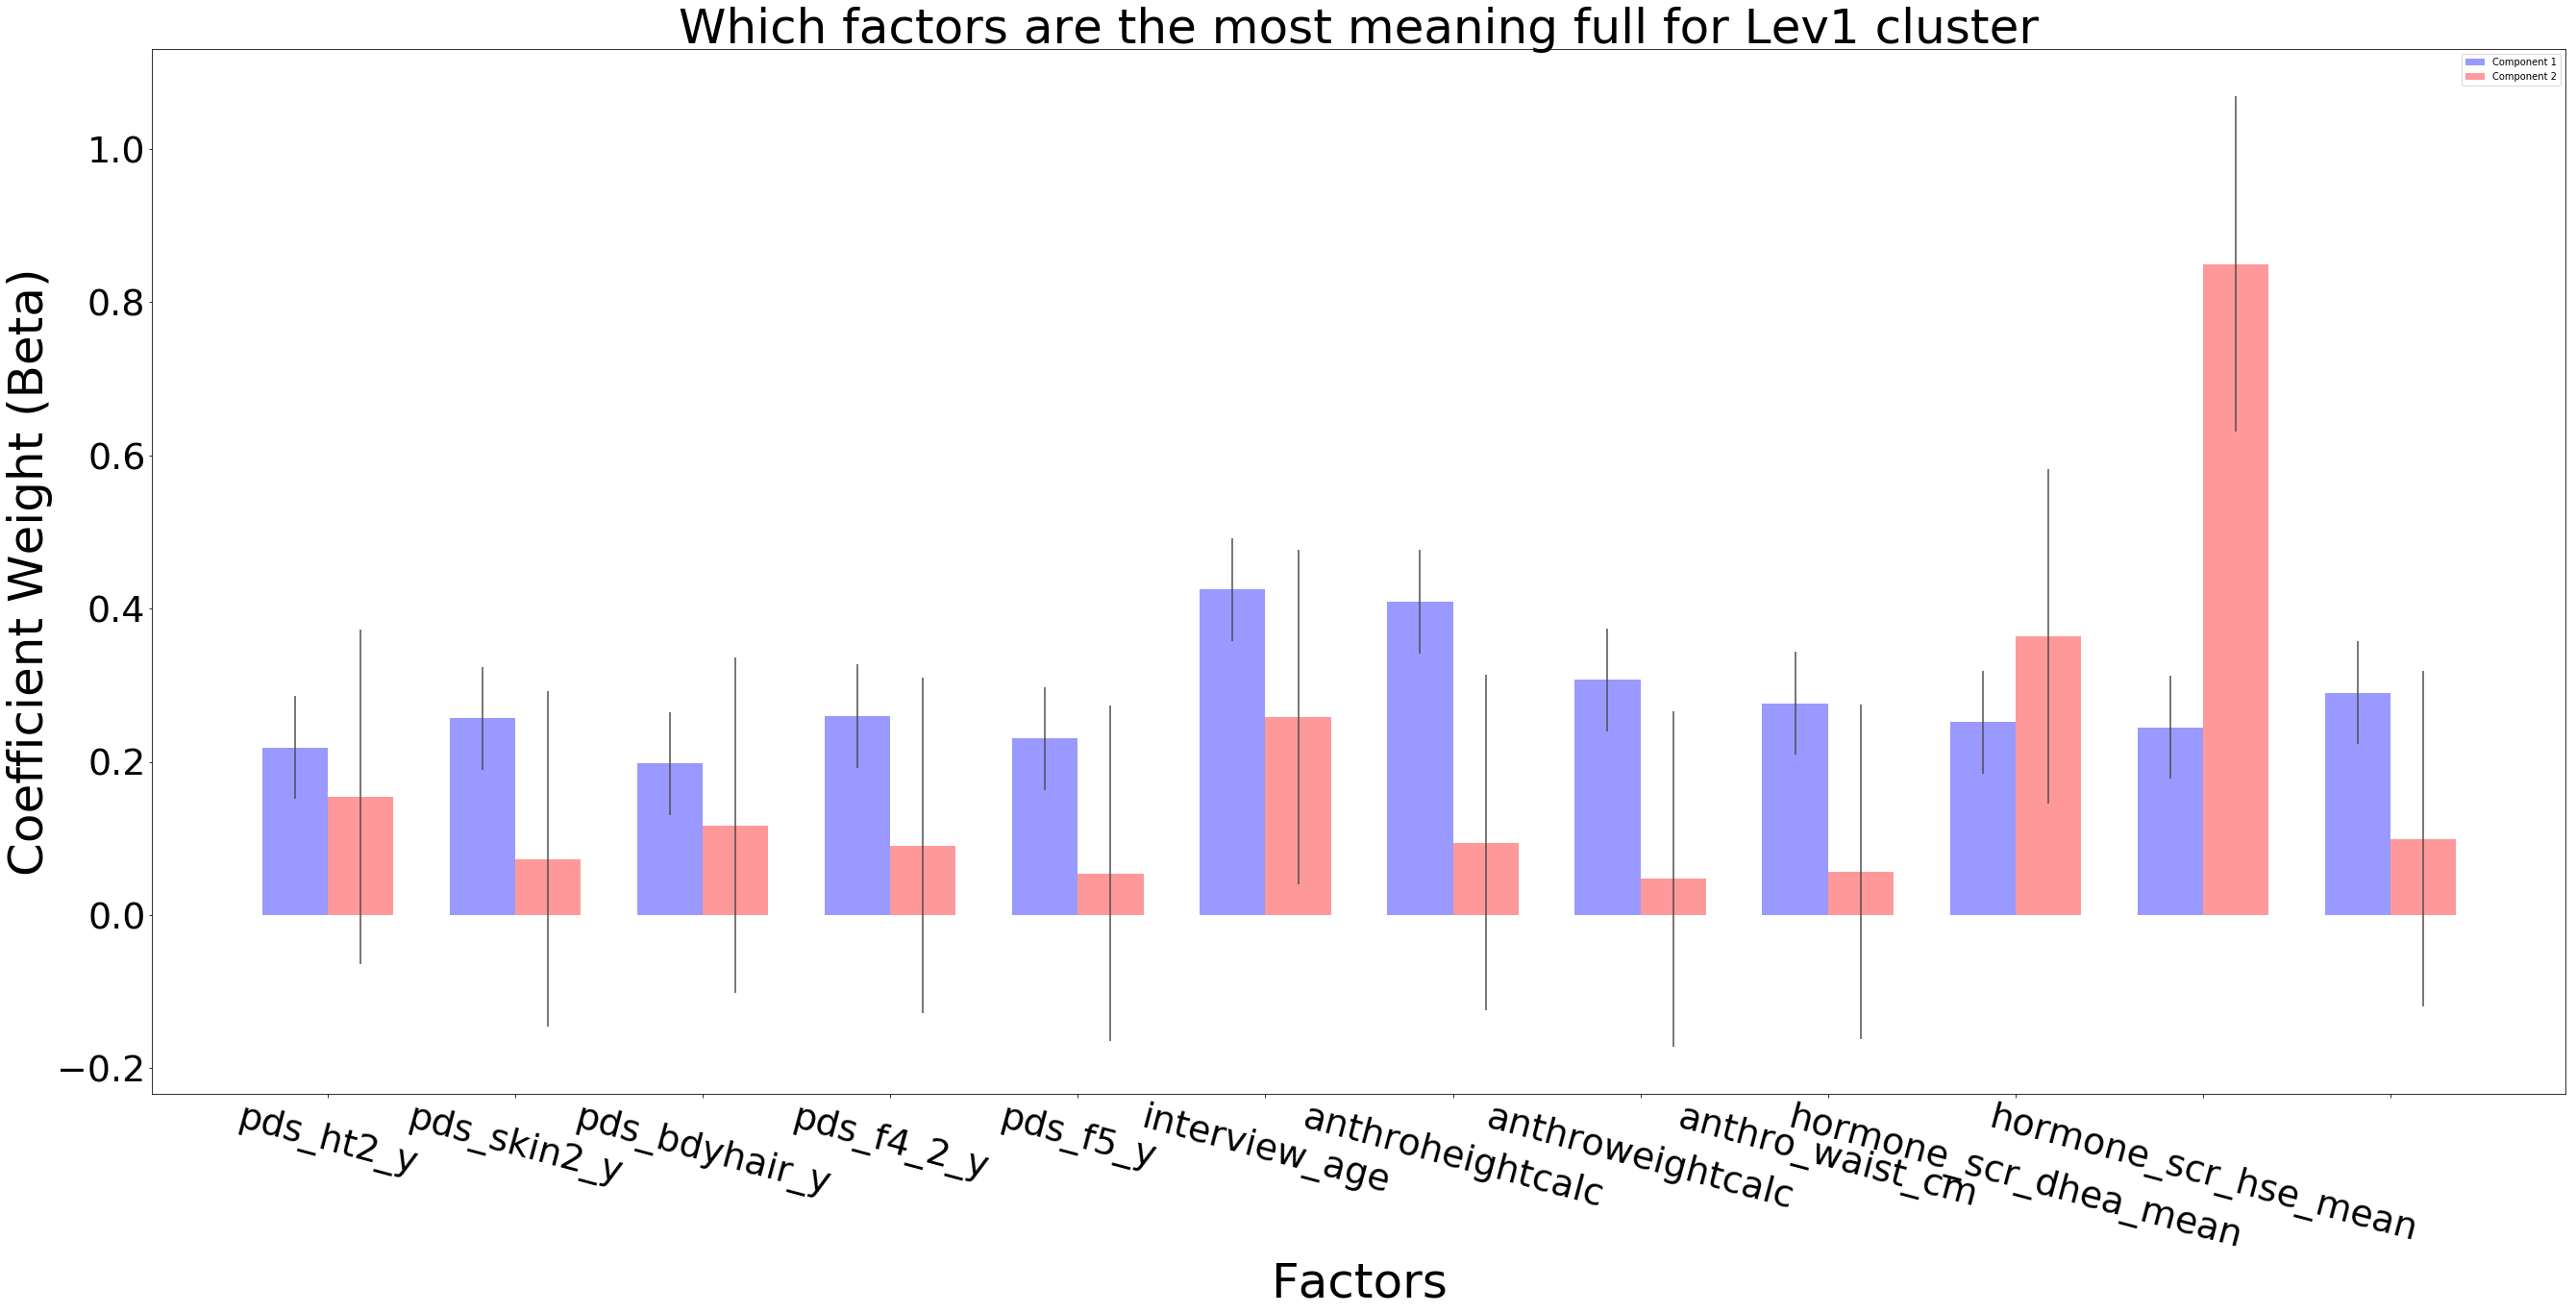

In [74]:
names=['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_f4_2_y',
'pds_f5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean']

All_Ratios = {'Lev1': All_lev1Ratio, 'Lev2': All_lev2Ratio, 'Lev3':All_lev3Ratio}
Coefs = {}
index = np.arange(12)
for key, value in All_Ratios.iteritems(): 
    pca = PCA(n_components=2)
    pca.fit_transform(value)
    i = np.identity(value.shape[1])  # identity matrix
    Coefs[key] = pca.transform(i)
    print(key)
    print pd.DataFrame(pca.components_,columns=names[0:13],index = ['PC-1','PC-2'])
    print('\n')
    
    n_groups = 12

    means_CP1 = np.absolute(pca.components_[0,:])
    std_CP1 = np.matrix.std(np.matrix(np.absolute(pca.components_[0,:])))

    means_CP2 = np.absolute(pca.components_[1,:])
    std_CP2 = np.matrix.std(np.matrix(np.absolute(pca.components_[1,:])))

    fig, ax = plt.subplots(figsize=(45, 20))
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, means_CP1, bar_width,
                    alpha=opacity, color='b',
                    yerr=std_CP1, error_kw=error_config,
                    label='Component 1')

    rects2 = ax.bar(index + bar_width, means_CP2, bar_width,
                    alpha=opacity, color='r',
                    yerr=std_CP2, error_kw=error_config,
                    label='Component 2')
    #plt.xlabel( fontsize=18)
    ax.set_xlabel('Factors', fontsize = 50)
    ax.set_ylabel('Coefficient Weight (Beta)', fontsize = 50)
    ax.set_title('Which factors are the most meaning full for %s cluster'%key, fontsize = 50)
    ax.set_xticks(index + bar_width / 2)
    
    ax.set_xticklabels(names[0:11], fontsize = 28, rotation = -15)
    ax.legend()
    ax.tick_params(labelsize = 38)

    fig=plt.figure(figsize=(100, 16), dpi= 80, facecolor='w', edgecolor='k')
    fig.tight_layout()
    plt.show()
    

## Looking at the data

merging the original and new data sets on the indexes

In [31]:
all_dat['real'].describe()

count     600
unique      3
top         3
freq      200
Name: real, dtype: int64

In [32]:
testData = pd.DataFrame(data = lady_dudes)
testData
# print(dudes)
# print(testData) 
total_g=pd.merge(all_dat, testData, on = ['sub'], how = 'outer')

In [33]:
colz=list(total_g.columns.values)
colz[2:]

['predicted',
 'real',
 'pds_ht2_y_x',
 'pds_skin2_y_x',
 'pds_bdyhair_y_x',
 'pds_m4_y_x',
 'pds_m5_y_x',
 'interview_age_x',
 'anthroheightcalc_x',
 'anthroweightcalc_x',
 'anthro_waist_cm_x',
 'hormone_scr_dhea_mean_x',
 'hormone_scr_hse_mean_x',
 'hormone_scr_ert_mean_x',
 'pds_ht2_y_y',
 'pds_skin2_y_y',
 'pds_bdyhair_y_y',
 'labels_true',
 'pds_f4_2_y',
 'pds_f5_y',
 'pds_m4_y_y',
 'pds_m5_y_y',
 'interview_age_y',
 'gender',
 'anthroheightcalc_y',
 'anthroweightcalc_y',
 'anthro_waist_cm_y',
 'hormone_scr_dhea_mean_y',
 'hormone_scr_hse_mean_y',
 'hormone_scr_ert_mean_y',
 'sex']

In [34]:
# total_g.to_csv('/Users/gracer/Google Drive/ABCD/important_txt/male_puberty_ana.csv', sep=',')

In [35]:
total_g.dtypes
total_g['predicted']=total_g['predicted'].astype(str).astype(float)

In [36]:
print(total_g.dtypes)
total_g.head()

index                       object
sub                         object
predicted                  float64
real                        object
pds_ht2_y_x                 object
pds_skin2_y_x               object
pds_bdyhair_y_x             object
pds_m4_y_x                  object
pds_m5_y_x                  object
interview_age_x             object
anthroheightcalc_x          object
anthroweightcalc_x          object
anthro_waist_cm_x           object
hormone_scr_dhea_mean_x     object
hormone_scr_hse_mean_x      object
hormone_scr_ert_mean_x      object
pds_ht2_y_y                  int64
pds_skin2_y_y                int64
pds_bdyhair_y_y              int64
labels_true                float64
pds_f4_2_y                 float64
pds_f5_y                   float64
pds_m4_y_y                 float64
pds_m5_y_y                 float64
interview_age_y              int64
gender                      object
anthroheightcalc_y         float64
anthroweightcalc_y         float64
anthro_waist_cm_y   

,index,sub,predicted,real,pds_ht2_y_x,pds_skin2_y_x,pds_bdyhair_y_x,pds_m4_y_x,pds_m5_y_x,interview_age_x,...,pds_m5_y_y,interview_age_y,gender,anthroheightcalc_y,anthroweightcalc_y,anthro_waist_cm_y,hormone_scr_dhea_mean_y,hormone_scr_hse_mean_y,hormone_scr_ert_mean_y,sex
0,253,NDAR_INVTH1YJVJ1,1.0,1,-1.63858,0.380471,-0.845055,0.249625,-0.191892,0.879012,...,0.0,127,F,51.00,56.00,20.0,635,63.3085,NaN,1
1,253,NDAR_INVTH1YJVJ1,1.0,1,-1.63858,0.380471,-0.845055,0.249625,-0.191892,0.879012,...,0.0,127,F,51.00,56.00,20.0,635,63.3085,NaN,1
2,197,NDAR_INVLABCHP1W,1.0,1,-0.494236,-0.916001,-0.845055,-1.09062,-0.191892,-1.75158,...,0.0,108,F,54.25,75.00,26.0,1504,1.0410,19.7315,1
3,197,NDAR_INVLABCHP1W,1.0,1,-0.494236,-0.916001,-0.845055,-1.09062,-0.191892,-1.75158,...,0.0,108,F,54.25,75.00,26.0,1504,1.0410,19.7315,1
4,23,NDAR_INV26V2CZ6Z,1.0,1,-0.494236,-0.916001,-0.845055,-1.09062,-0.191892,-1.47468,...,0.0,110,F,53.35,67.55,23.5,1,NaN,NaN,1


In [37]:
# identify the columns we want to aggregate by; this could
# equivalently be defined as list(df.columns[0:3])
group_cols = ['sub']
# identify the columns which we want to average; this could
# equivalently be defined as list(df.columns[4:])
metric_cols = colz[2:]

# create a new DataFrame with a MultiIndex consisting of the group_cols
# and a column for the mean of each column in metric_cols
aggs = total_g.groupby(group_cols)[metric_cols].mean()
# remove the metric_cols from df because we are going to replace them
# with the means in aggs
total_g.drop(metric_cols, axis=1, inplace=True)
# dedupe to leave only one row with each combination of group_cols
# in df
total_g.drop_duplicates(subset=group_cols, keep='last', inplace=True)
# add the mean columns from aggs into df
df = total_g.merge(right=aggs, right_index=True, left_on=group_cols, how='right')

In [38]:
df.head()


,index,sub,predicted,pds_ht2_y_y,pds_skin2_y_y,pds_bdyhair_y_y,labels_true,pds_f4_2_y,pds_f5_y,pds_m4_y_y,pds_m5_y_y,interview_age_y,anthroheightcalc_y,anthroweightcalc_y,anthro_waist_cm_y,hormone_scr_dhea_mean_y,hormone_scr_hse_mean_y,hormone_scr_ert_mean_y,sex
1,253,NDAR_INVTH1YJVJ1,1.0,1,2,1,1.4,2.0,1.0,0.0,0.0,127,51.00,56.00,20.0,635,63.3085,NaN,1
3,197,NDAR_INVLABCHP1W,1.0,2,1,1,1.2,1.0,1.0,0.0,0.0,108,54.25,75.00,26.0,1504,1.0410,19.7315,1
7,23,NDAR_INV26V2CZ6Z,1.5,2,1,1,1.2,1.0,1.0,0.0,0.0,110,53.35,67.55,23.5,1,NaN,NaN,1
9,106,NDAR_INVALEZFEEH,1.0,2,2,1,1.4,1.0,1.0,0.0,0.0,127,55.50,80.50,28.0,1770,0.0000,0.0000,1
11,267,NDAR_INVVF5B2JT1,1.0,1,2,1,1.2,1.0,1.0,0.0,0.0,118,50.00,56.00,19.0,1,NaN,NaN,1


In [39]:
varsy =[dudes, trans, FINAL, total_g, df] 

In [40]:
all_vars = {}
keys = ['lady_dudes','trans','FINAL','total_g','df'] 

for i in range(0,len(keys)):
    all_vars[keys[i]] = varsy[i]


In [41]:
import pickle

filename = '/Users/gracer/Google Drive/ABCD/important_txt/female_data_test.pickle'
with open(filename, 'wb') as handle:
    pickle.dump(all_vars, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)

# print all_vars == b

In [42]:
df.to_csv('/Users/gracer/Google Drive/ABCD/important_txt/female_puberty_ana_test.csv', sep=',')

* All_clust (180,)<- length of the subjects over all runs
* All_clust_space(180,)<-length of the subjects over all runs
* All_means(180,)<-length of the subjects
* All_labels(180,) <- length of subjects True Labels
* All_index(180,)<-length of subjects Index of the original data
* All_comp(18, 12)<- rows are the the PCA components, times the number of the levels, and the number of runs. cols are the factors
* All_var_ratio(108, 2)<-rows are the number of runs, times the number of factors, times the number of levels
* All_var(3, 6)<- rows are the number of runs, the columns are the PCA componenets times the number of levels
* All_mean(9, 12)<- rows are the number of runs by the number of levels the columns are the number of factors
* All_data(180, 14)<-rows are the number of subjects, the columns are number of factors plus the index, plus the components

* components_ : array, shape (n_components, n_features)

* explained_variance_ratio_ : array, shape (n_components,)

*  singular_values_ : array, shape (n_components,)

*  mean_ : array, shape (n_features,)

*  n_components_ : int

*  noise_variance_ : float